In [ ]:
!pip install kmodes
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from kmodes.kmodes import KModes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('/content/Customers.csv')
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
344,345,Female,4,148431,99,Healthcare,1,8
345,346,Female,78,126599,84,Lawyer,0,3
346,347,Female,58,57180,22,Healthcare,9,1
347,348,Female,99,184426,41,Artist,9,1


# **K-Means Clustering**

In [ ]:
# Assuming 'data' is your DataFrame
X = data[['Annual Income ($)', 'Spending Score (1-100)', 'Age', 'Family Size', 'Work Experience']]

In [ ]:
class KMeans(KMeans):
    def fit(self, X, y=None):
        super().fit(X, y)
        for i, center in enumerate(self.cluster_centers_):
            print(f"Iteration {i+1} Centroids:")
            print(center)
        return self

In [ ]:
# Create an instance of the KMeans class and fit the model
kmeans = KMeans(n_clusters=4, init='random', random_state=42)
kmeans.fit(X)

Iteration 1 Centroids:
[5.54258182e+04 5.14272727e+01 4.02454545e+01 3.10909091e+00
 3.64545455e+00]
Iteration 2 Centroids:
[1.51298115e+05 5.53461538e+01 5.12307692e+01 2.65384615e+00
 3.50000000e+00]
Iteration 3 Centroids:
[8.84865676e+04 4.87297297e+01 4.42792793e+01 2.81081081e+00
 3.56756757e+00]
Iteration 4 Centroids:
[1.85882353e+04 5.09019608e+01 4.49215686e+01 2.83333333e+00
 2.88235294e+00]


KMeans(init='random', n_clusters=4, random_state=42)

In [ ]:
print("Centroids:")
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income ($)', 'Spending Score (1-100)', 'Age', 'Family Size', 'Work Experience'])
print(centroids_df)

print("\nLabels:")
print(kmeans.labels_)

Centroids:
   Annual Income ($)  Spending Score (1-100)        Age  Family Size  \
0       55425.818182               51.427273  40.245455     3.109091   
1      151298.115385               55.346154  51.230769     2.653846   
2       88486.567568               48.729730  44.279279     2.810811   
3       18588.235294               50.901961  44.921569     2.833333   

   Work Experience  
0         3.645455  
1         3.500000  
2         3.567568  
3         2.882353  

Labels:
[3 3 2 0 0 0 3 2 2 2 3 2 2 2 3 0 3 2 3 0 2 3 0 0 0 0 0 2 3 3 0 3 0 0 2 2 3
 0 3 0 3 2 3 3 2 3 0 0 2 3 2 2 2 0 3 2 0 3 0 2 2 0 0 0 0 3 3 2 2 2 2 3 0 3
 2 0 0 2 2 2 0 0 1 3 3 3 3 0 2 0 0 3 2 3 3 2 3 0 0 2 0 3 2 0 2 2 0 2 3 3 3
 3 0 3 2 0 3 2 2 2 3 0 2 3 3 0 2 3 0 0 0 3 0 0 2 2 2 2 3 3 3 0 0 2 0 3 0 0
 0 2 3 0 3 2 2 3 3 2 0 2 3 0 3 0 0 0 2 2 0 3 0 3 2 2 3 3 3 0 2 0 0 0 3 0 0
 2 3 0 2 2 2 2 2 0 3 0 2 3 2 3 0 2 0 0 0 3 0 2 3 0 0 3 3 0 2 0 3 3 0 2 2 2
 3 2 2 3 0 2 3 2 2 3 3 3 2 0 3 3 3 0 2 2 0 0 3 0 3 3 0 0 3 0 3 2

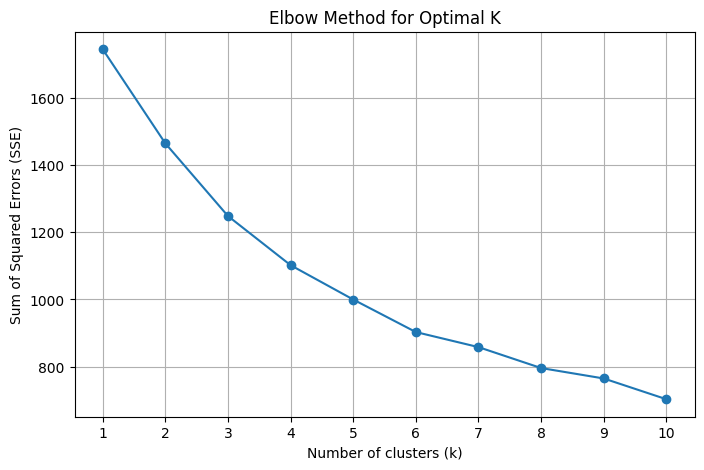

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame
X = data[['Annual Income ($)', 'Spending Score (1-100)', 'Age', 'Family Size', 'Work Experience']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.xticks(k_range)  # Ensure all k values are shown on x-axis
plt.show()


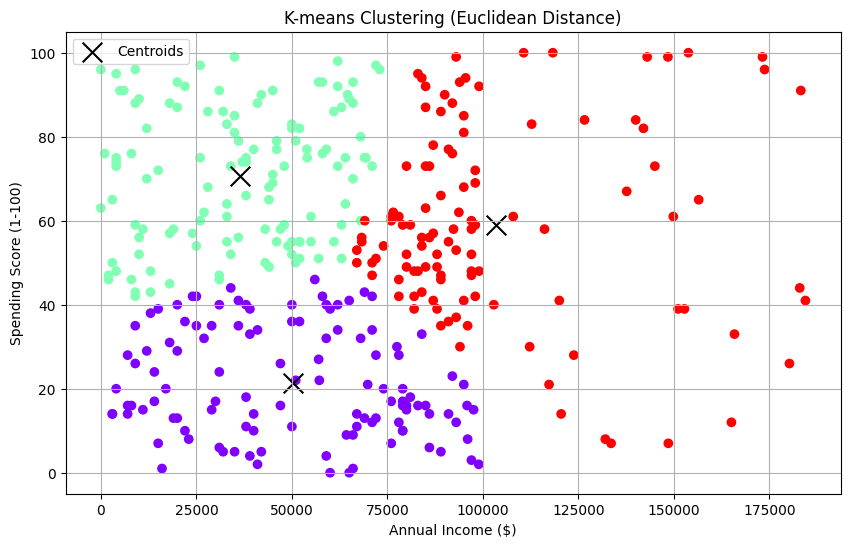

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
features = ['Annual Income ($)', 'Spending Score (1-100)']
X = data[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
kmeans.fit(X_scaled)

# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')

# If the K-means was fitted on scaled data, transform the centroids back
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Access the centroids correctly
plt.scatter(centroids[:, 0],  # Annual Income
            centroids[:, 1],  # Spending Score
            color='black', marker='x', s=200, label='Centroids')

plt.title('K-means Clustering (Euclidean Distance)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
class KMeansManhattan(KMeans):
    def _euclidean_distances(self, X, Y=None, Y_norm_squared=None, squared=False):
        return pairwise_distances(X, Y, metric='manhattan')

In [ ]:
kmeans_manhattan = KMeansManhattan(n_clusters=3, init='random', random_state=42)
kmeans_manhattan.fit(X)

KMeansManhattan(init='random', n_clusters=3, random_state=42)

In [ ]:
print("Centroids:")
print(kmeans_manhattan.cluster_centers_)
print("\nLabels:")
print(kmeans_manhattan.labels_)

Centroids:
[[2.72052980e+04 5.08543046e+01]
 [1.46608800e+05 5.67000000e+01]
 [7.88234286e+04 4.95059524e+01]]

Labels:
[0 0 2 2 0 2 0 2 2 2 0 2 2 2 0 0 0 2 0 2 2 0 0 2 2 0 2 2 0 0 0 0 2 2 2 2 0
 2 0 2 0 2 0 0 2 0 0 2 2 0 2 2 2 2 0 2 2 0 2 2 2 0 0 0 2 0 0 2 2 2 2 0 0 0
 2 0 2 2 2 2 0 2 1 0 0 0 0 2 2 2 0 0 2 0 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 0 0
 0 2 0 2 0 0 2 2 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 2 2 2 2 0 0 0 2 2 2 2 0 0 0
 0 2 0 0 0 2 2 0 0 2 2 2 0 0 0 2 0 2 2 2 2 0 2 0 2 2 0 0 0 0 2 0 2 2 0 2 0
 2 0 0 2 2 2 2 2 0 0 0 2 0 2 0 0 2 2 2 2 0 2 2 0 0 2 0 0 0 2 2 0 0 2 2 2 2
 0 2 2 0 0 2 0 2 2 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 2 2
 0 0 0 0 0 2 2 0 0 0 2 2 0 0 1 0 2 0 2 2 0 2 2 0 2 2 2 1 0 0 0 0 2 0 0 2 2
 0 2 2 0 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 1 2 2 2 2 2 2 1 2 1 2 2 1 2 1
 1 1 2 2 2 1 2 1 1 2 1 1 1 2 1 1]


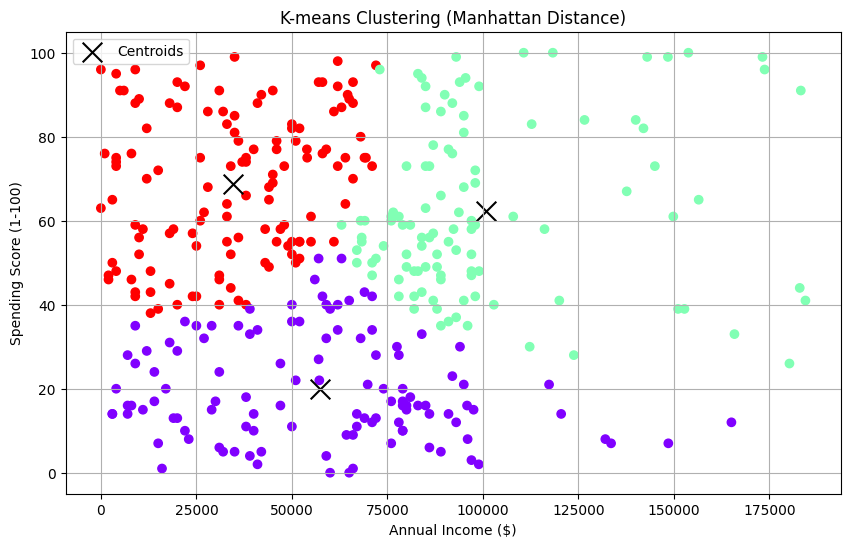

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define a custom KMeans class for Manhattan distance
class KMeansManhattan:
    def __init__(self, n_clusters=3, random_state=None, max_iter=300):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.max_iter = max_iter
        self.centroids = None
        self.labels_ = None  # Initialize labels attribute

    def fit(self, X):
        np.random.seed(self.random_state)
        # Initialize centroids randomly from the data
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Assign clusters based on Manhattan distance
            distances = np.array([[np.sum(np.abs(x - centroid)) for centroid in self.centroids] for x in X])
            self.labels_ = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.array([X[self.labels_ == i].mean(axis=0) if np.any(self.labels_ == i) else self.centroids[i] for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([[np.sum(np.abs(x - centroid)) for centroid in self.centroids] for x in X])
        return np.argmin(distances, axis=1)

# Assuming 'data' is your DataFrame
features = ['Annual Income ($)', 'Spending Score (1-100)']
X = data[features].values  # Ensure X is a NumPy array

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the custom K-means model using Manhattan distance
kmeans_manhattan = KMeansManhattan(n_clusters=3, random_state=42)
kmeans_manhattan.fit(X_scaled)

# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
# Access the columns using numerical indices for the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=kmeans_manhattan.labels_, cmap='rainbow')
# X[:, 0] for 'Annual Income ($)' and X[:, 1] for 'Spending Score (1-100)'


# Inverse transform the centroids to original scale
centroids = scaler.inverse_transform(kmeans_manhattan.centroids)

# Access the centroids correctly
plt.scatter(centroids[:, 0],  # Annual Income
            centroids[:, 1],  # Spending Score
            color='black', marker='x', s=200, label='Centroids')

plt.title('K-means Clustering (Manhattan Distance)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
kmeans_squared = KMeans(n_clusters=4, init='random', random_state=42)
kmeans_squared.fit(X)

KMeans(init='random', n_clusters=4, random_state=42)

In [ ]:
print("Centroids:")
print(kmeans_squared.cluster_centers_)
print("\nLabels:")
print(kmeans_squared.labels_)

Centroids:
[[5.54258182e+04 5.14272727e+01]
 [1.51298115e+05 5.53461538e+01]
 [8.84865676e+04 4.87297297e+01]
 [1.85882353e+04 5.09019608e+01]]

Labels:
[3 3 2 0 0 0 3 2 2 2 3 2 2 2 3 0 3 2 3 0 2 3 0 0 0 0 0 2 3 3 0 3 0 0 2 2 3
 0 3 0 3 2 3 3 2 3 0 0 2 3 2 2 2 0 3 2 0 3 0 2 2 0 0 0 0 3 3 2 2 2 2 3 0 3
 2 0 0 2 2 2 0 0 1 3 3 3 3 0 2 0 0 3 2 3 3 2 3 0 0 2 0 3 2 0 2 2 0 2 3 3 3
 3 0 3 2 0 3 2 2 2 3 0 2 3 3 0 2 3 0 0 0 3 0 0 2 2 2 2 3 3 3 0 0 2 0 3 0 0
 0 2 3 0 3 2 2 3 3 2 0 2 3 0 3 0 0 0 2 2 0 3 0 3 2 2 3 3 3 0 2 0 0 0 3 0 0
 2 3 0 2 2 2 2 2 0 3 0 2 3 2 3 0 2 0 0 0 3 0 2 3 0 0 3 3 0 2 0 3 3 0 2 2 2
 3 2 2 3 0 2 3 2 2 3 3 3 2 0 3 3 3 0 2 2 0 0 3 0 3 3 0 0 3 0 3 2 3 2 0 2 0
 3 0 3 3 3 2 2 3 3 3 2 2 3 3 1 3 0 3 2 2 0 0 2 0 2 0 0 1 3 3 3 3 0 0 0 2 0
 3 2 2 3 1 2 1 1 2 1 1 1 2 1 2 2 2 0 0 2 1 1 1 0 0 0 2 2 2 1 0 1 2 2 1 2 1
 1 2 2 0 2 1 0 1 1 2 1 1 1 0 1 1]


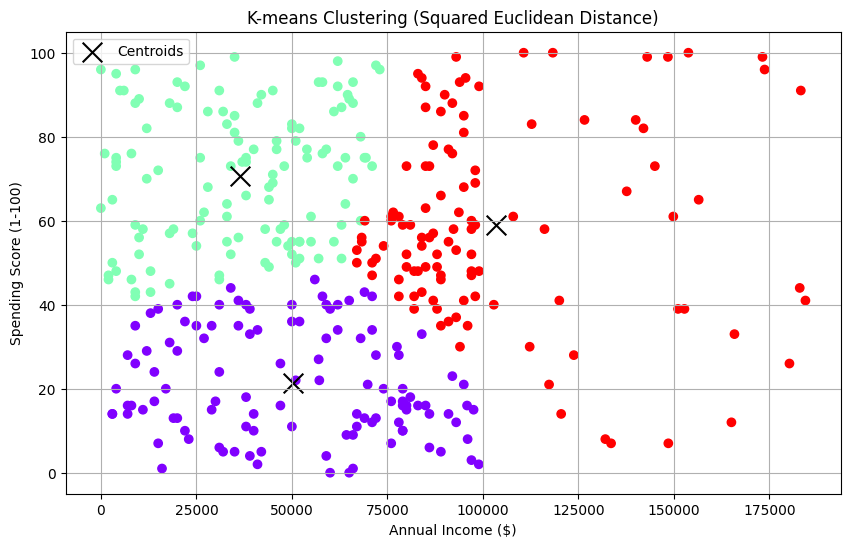

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
features = ['Annual Income ($)', 'Spending Score (1-100)']
X = data[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the K-means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Scatter plot of Annual Income vs Spending Score with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')

# If the K-means was fitted on scaled data, transform the centroids back to the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot centroids
plt.scatter(centroids[:, 0],  # Annual Income
            centroids[:, 1],  # Spending Score
            color='black', marker='x', s=200, label='Centroids')

plt.title('K-means Clustering (Squared Euclidean Distance)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


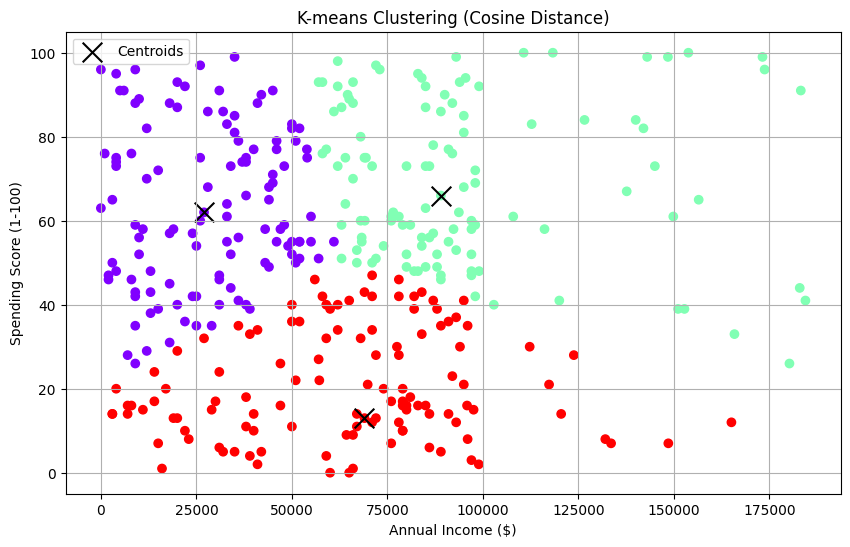

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_distances

# Assuming 'data' is your DataFrame
features = ['Annual Income ($)', 'Spending Score (1-100)']
X = data[features]

# Scale the data (Cosine distance doesn't require centering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute cosine distances and transform the data into a cosine distance space
cosine_dist_matrix = cosine_distances(X_scaled)

# Fit MiniBatchKMeans on the cosine distance matrix
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans.fit(cosine_dist_matrix)

# Scatter plot of Annual Income vs Spending Score with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')

# Instead of plotting transformed centroids, which is incorrect,
# plot the data points closest to the cluster centers in the original space
closest_data_points = []
for cluster_center in kmeans.cluster_centers_:
    # Find the index of the data point closest to the cluster center in the cosine distance matrix
    closest_data_point_index = np.argmin(cosine_dist_matrix[np.argmin(cosine_distances(cluster_center.reshape(1, -1), cosine_dist_matrix))])
    closest_data_points.append(X.iloc[closest_data_point_index].values)  # Append original data point

closest_data_points = np.array(closest_data_points)

# Plot the closest data points as "centroids"
plt.scatter(closest_data_points[:, 0],  # Annual Income
            closest_data_points[:, 1],  # Spending Score
            color='black', marker='x', s=200, label='Centroids')

plt.title('K-means Clustering (Cosine Distance)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#K-means ++

In [22]:
kmeans_pp = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pp.fit(X)

KMeans(n_clusters=4, random_state=42)

In [23]:
print("Centroids:")
print(kmeans_pp.cluster_centers_)
print("\nLabels:")
print(kmeans_pp.labels_)

Centroids:
[[4.21376147e+01 5.71544954e+04 5.19082569e+01 3.70642202e+00
  3.09174312e+00]
 [4.40277778e+01 1.96666667e+04 5.07037037e+01 2.98148148e+00
  2.86111111e+00]
 [4.35555556e+01 8.98286667e+04 4.79537037e+01 3.45370370e+00
  2.77777778e+00]
 [5.01666667e+01 1.53886000e+05 5.76666667e+01 3.45833333e+00
  2.75000000e+00]]

Labels:
[1 1 2 0 1 0 1 2 2 2 1 2 2 2 1 0 1 2 1 0 2 1 0 0 0 0 0 2 1 1 0 1 0 0 2 2 1
 0 1 0 1 2 1 1 0 1 0 0 2 1 2 2 2 0 1 2 0 1 0 2 2 0 0 0 0 1 1 2 2 2 2 1 0 1
 2 0 0 2 2 2 0 0 2 1 1 1 1 0 2 0 0 1 2 1 1 2 1 0 0 2 0 1 2 0 2 2 0 2 1 1 1
 1 0 1 2 0 1 2 2 2 1 0 2 1 1 0 2 1 1 0 0 1 0 0 2 2 2 2 1 1 1 0 0 2 0 1 0 1
 0 2 1 0 1 2 2 1 1 2 0 2 1 0 1 0 0 0 2 2 0 1 0 1 2 2 1 1 1 0 2 0 0 0 1 0 0
 0 1 0 2 2 2 2 2 0 1 0 2 1 2 1 0 2 0 0 0 1 0 2 1 0 0 1 1 0 2 0 1 1 0 2 2 0
 1 2 2 1 0 2 1 2 2 1 1 1 2 0 1 1 1 0 2 2 0 0 1 1 1 1 0 0 1 0 1 0 1 2 1 0 0
 1 0 1 1 1 2 2 1 1 1 2 2 1 1 3 1 0 1 2 2 0 0 2 0 2 0 0 3 1 1 1 1 0 1 0 2 0
 1 2 2 1 3 2 3 3 2 3 3 2 2 3 2 2 2 0 0 2 3 3 3 0 0 0 2 2 2 

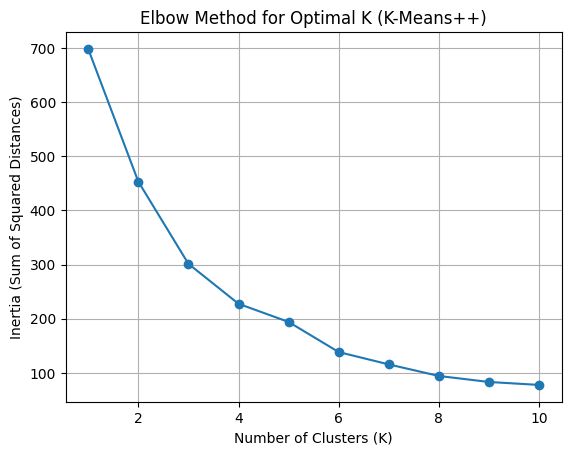

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('/content/Customers.csv')
X = data[['Annual Income ($)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertia = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_pp.fit(X_scaled)
    inertia.append(kmeans_pp.inertia_)  # Inertia: sum of squared distances to nearest cluster center

# Plot the elbow graph
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal K (K-Means++)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


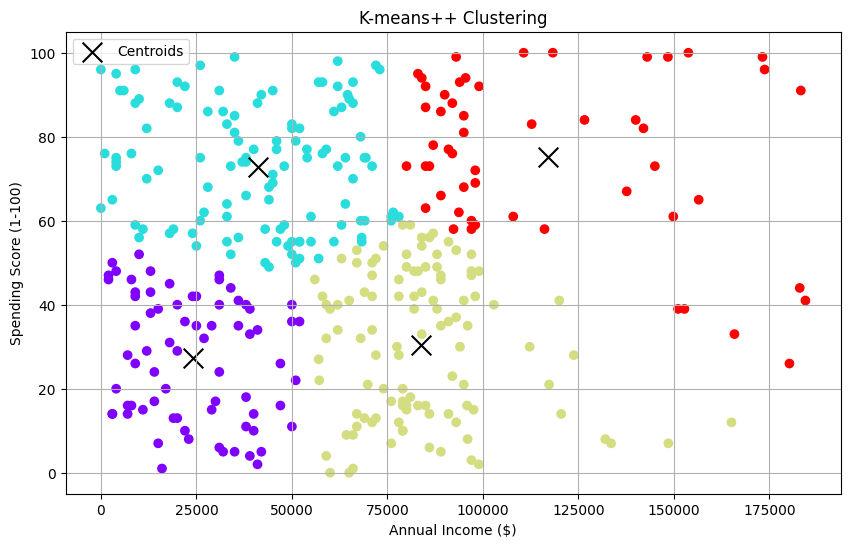

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and you've already loaded it
X = data[['Annual Income ($)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means++ with 4 clusters
kmeans_pp = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pp.fit(X_scaled)

# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income ($)'], X['Spending Score (1-100)'], c=kmeans_pp.labels_, cmap='rainbow')

# Transform the centroids back to the original scale
centroids = scaler.inverse_transform(kmeans_pp.cluster_centers_)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')

plt.title('K-means++ Clustering')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


# K Mode

In [26]:
pip install kmodes

<ipython-input-38-6eef7edf57b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['Gender'] = X_categorical['Gender'].map({'Male': 0, 'Female': 1})


   Gender  Age  Annual Income ($)  Spending Score (1-100)
0       0   19              15000                      39
1       0   21              35000                      81
2       1   20              86000                       6
3       1   23              59000                      77
4       1   31              38000                      40
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1154.0
Best run was

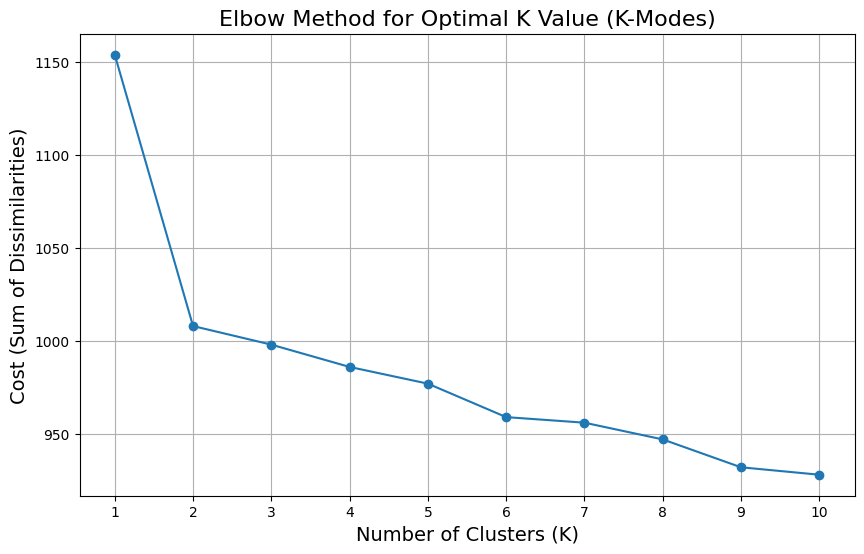

In [38]:
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Customers.csv')

# Select the relevant columns
X_categorical = data[['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Map 'Gender' to numerical values: Male = 0, Female = 1
X_categorical['Gender'] = X_categorical['Gender'].map({'Male': 0, 'Female': 1})

# Optional: Display the first few rows to verify the changes
print(X_categorical.head())

def kmodes_elbow(X, max_clusters=10):
    costs = []

    for k in range(1, max_clusters + 1):
        km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
        km.fit(X)
        costs.append(km.cost_)  # cost is the sum of dissimilarities within clusters

    return costs

# Calculate costs for different K values
costs = kmodes_elbow(X_categorical, max_clusters=10)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), costs, marker='o')
plt.title('Elbow Method for Optimal K Value (K-Modes)', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Cost (Sum of Dissimilarities)', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig('elbow_method_k_modes.png')  # Save the plot as a .png file
plt.show()


<ipython-input-41-1880341d2a59>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['Gender'] = X_categorical['Gender'].map({'Male': 0, 'Female': 1})
<ipython-input-41-1880341d2a59>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['Profession'] = X_categorical['Profession'].fillna(X_categorical['Profession'].mode()[0])


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 348.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13, cost: 235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 11, cost: 235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 332.0
Best run was number 3
Centroids:
[['1' 'Artist']
 ['0' 'Artist']]

Labels:
[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 

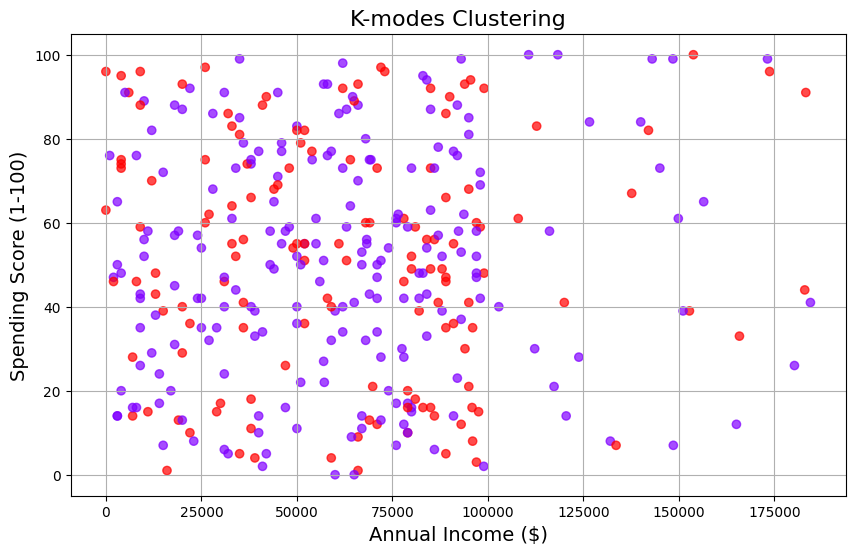

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

# Load the dataset
data = pd.read_csv('/content/Customers.csv')

# Select the relevant columns
X_categorical = data[['Gender', 'Profession']]  # Keeping only categorical columns for K-modes

# Map 'Gender' to numerical values: Male = 0, Female = 1
X_categorical['Gender'] = X_categorical['Gender'].map({'Male': 0, 'Female': 1})

# Handle missing values in 'Profession' column
# Imputing with the most frequent value (mode)
X_categorical['Profession'] = X_categorical['Profession'].fillna(X_categorical['Profession'].mode()[0])

# Initialize K-modes
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)

# Fit the model and predict clusters
clusters = km.fit_predict(X_categorical)

# Print centroids and labels
print("Centroids:")
print(km.cluster_centroids_)
print("\nLabels:")
print(clusters)

# Prepare for plotting
# Extracting numerical columns for scatter plot
X_numerical = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Scatter plot of 'Annual Income' and 'Spending Score', colored by clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_numerical['Annual Income ($)'], X_numerical['Spending Score (1-100)'], c=clusters, cmap='rainbow', alpha=0.7)
plt.title('K-modes Clustering', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.grid(True)
plt.show()

#K-Nearest Neighbours

Euclidean - K=1: Train Accuracy = 1.0000, Test Accuracy = 0.6143
Euclidean - K=2: Train Accuracy = 0.7634, Test Accuracy = 0.5857
Euclidean - K=3: Train Accuracy = 0.7778, Test Accuracy = 0.5429
Euclidean - K=4: Train Accuracy = 0.6989, Test Accuracy = 0.6286
Euclidean - K=5: Train Accuracy = 0.7133, Test Accuracy = 0.6286
Euclidean - K=6: Train Accuracy = 0.6774, Test Accuracy = 0.6429
Euclidean - K=7: Train Accuracy = 0.6918, Test Accuracy = 0.6429
Euclidean - K=8: Train Accuracy = 0.6631, Test Accuracy = 0.6429
Euclidean - K=9: Train Accuracy = 0.6846, Test Accuracy = 0.6571
Euclidean - K=10: Train Accuracy = 0.6487, Test Accuracy = 0.6857
Euclidean - K=11: Train Accuracy = 0.6272, Test Accuracy = 0.6143
Euclidean - K=12: Train Accuracy = 0.6308, Test Accuracy = 0.6143
Euclidean - K=13: Train Accuracy = 0.6416, Test Accuracy = 0.6000
Euclidean - K=14: Train Accuracy = 0.6237, Test Accuracy = 0.6000
Euclidean - K=15: Train Accuracy = 0.6272, Test Accuracy = 0.6000
Euclidean - K=16: T

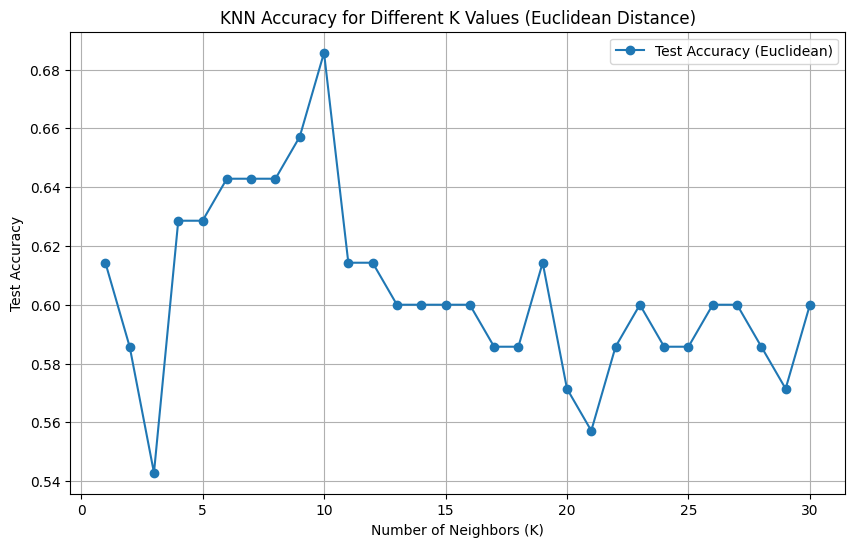

Manhattan - K=1: Train Accuracy = 1.0000, Test Accuracy = 0.5571
Manhattan - K=2: Train Accuracy = 0.7599, Test Accuracy = 0.6000
Manhattan - K=3: Train Accuracy = 0.7885, Test Accuracy = 0.5571
Manhattan - K=4: Train Accuracy = 0.6989, Test Accuracy = 0.6286
Manhattan - K=5: Train Accuracy = 0.6918, Test Accuracy = 0.6143
Manhattan - K=6: Train Accuracy = 0.6846, Test Accuracy = 0.6429
Manhattan - K=7: Train Accuracy = 0.6882, Test Accuracy = 0.6286
Manhattan - K=8: Train Accuracy = 0.6595, Test Accuracy = 0.6286
Manhattan - K=9: Train Accuracy = 0.6738, Test Accuracy = 0.6714
Manhattan - K=10: Train Accuracy = 0.6487, Test Accuracy = 0.6714
Manhattan - K=11: Train Accuracy = 0.6344, Test Accuracy = 0.6000
Manhattan - K=12: Train Accuracy = 0.6308, Test Accuracy = 0.6000
Manhattan - K=13: Train Accuracy = 0.6416, Test Accuracy = 0.6000
Manhattan - K=14: Train Accuracy = 0.6237, Test Accuracy = 0.6000
Manhattan - K=15: Train Accuracy = 0.6272, Test Accuracy = 0.6000
Manhattan - K=16: T

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/Customers.csv')

# Select features and target variable
X_knn = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]
y_knn = data['Gender']  # Assuming Gender is the target variable for classification

# Encode the target variable
le = LabelEncoder()
y_knn = le.fit_transform(y_knn)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

def knn_with_metric(metric):
    train_accuracy_results = []
    test_accuracy_results = []

    for k in range(1, 31):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)

        # Predict on training data
        y_train_pred = knn.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_accuracy_results.append(train_accuracy)

        # Predict on testing data
        y_test_pred = knn.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_accuracy_results.append(test_accuracy)

    return train_accuracy_results, test_accuracy_results

# Example usage: Euclidean Distance
train_acc_euclidean, test_acc_euclidean = knn_with_metric('euclidean')
for k in range(1, 31):
    print(f"Euclidean - K={k}: Train Accuracy = {train_acc_euclidean[k-1]:.4f}, Test Accuracy = {test_acc_euclidean[k-1]:.4f}")

# Plotting Euclidean Distance Results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), test_acc_euclidean, marker='o', label='Test Accuracy (Euclidean)')
plt.title('KNN Accuracy for Different K Values (Euclidean Distance)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Example usage: Manhattan Distance
train_acc_manhattan, test_acc_manhattan = knn_with_metric('manhattan')
for k in range(1, 31):
    print(f"Manhattan - K={k}: Train Accuracy = {train_acc_manhattan[k-1]:.4f}, Test Accuracy = {test_acc_manhattan[k-1]:.4f}")

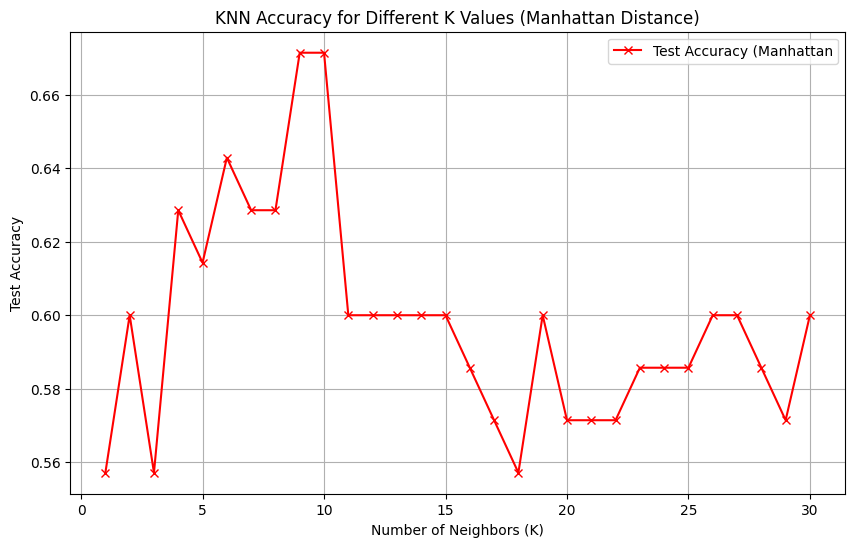

In [47]:
# Plotting Manhattan Distance Results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), test_acc_manhattan, marker='x', label='Test Accuracy (Manhattan', color='red')
plt.title('KNN Accuracy for Different K Values (Manhattan Distance)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.legend()
plt.show()


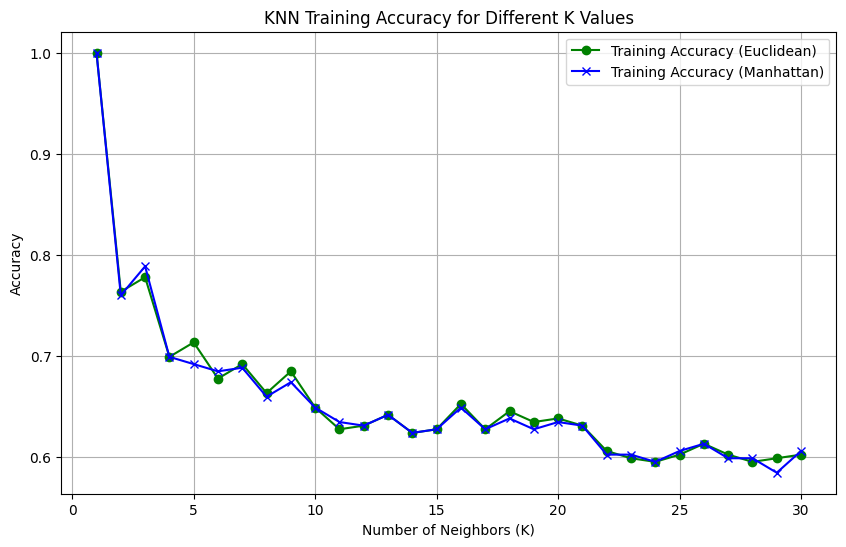

In [44]:

# Plotting training accuracy for both metrics
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), train_acc_euclidean, marker='o', label='Training Accuracy (Euclidean)', color='green')
plt.plot(range(1, 31), train_acc_manhattan, marker='x', label='Training Accuracy (Manhattan)', color='blue')
plt.title('KNN Training Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
train_accuracy_results = []
test_accuracy_results = []

In [49]:
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on training data
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_results.append(train_accuracy)

    # Predict on testing data
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_results.append(test_accuracy)

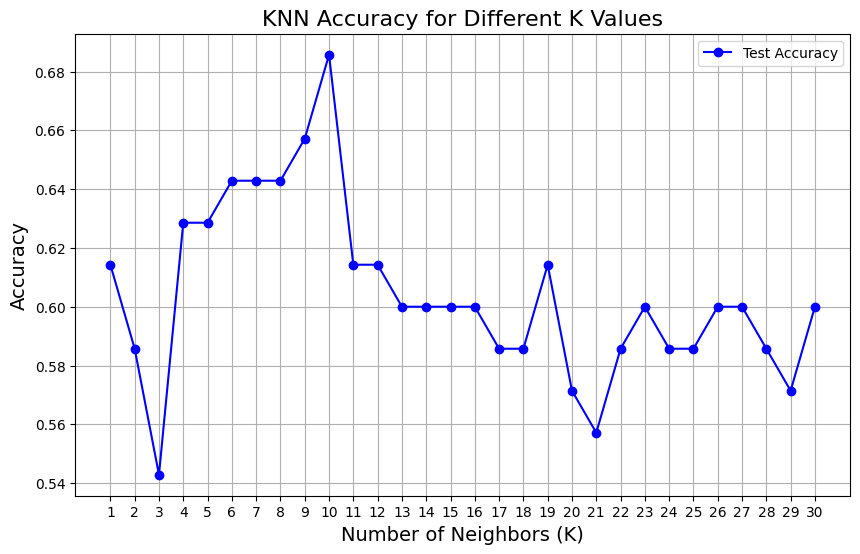

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/Customers.csv')

# Select features and target variable
X_knn = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]
y_knn = data['Gender']  # Assuming Gender is the target variable for classification

# Encode the target variable
le = LabelEncoder()
y_knn = le.fit_transform(y_knn)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Accuracy results for different K values
accuracy_results = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

# Plotting the accuracy results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), accuracy_results, marker='o', color='blue', label='Test Accuracy')
plt.title('KNN Accuracy for Different K Values', fontsize=16)
plt.xlabel('Number of Neighbors (K)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(range(1, 31))
plt.grid(True)
plt.legend()
plt.show()


In [52]:
optimal_k = np.argmax(accuracy_results) + 1
print(f"Optimal K value for classification: {optimal_k}")

Optimal K value for classification: 10


In [53]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Accuracy with optimal K ({optimal_k}): {accuracy_optimal}")

Accuracy with optimal K (10): 0.6857142857142857


In [54]:
y_regression = data['Spending Score (1-100)']

In [55]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_knn, y_regression, test_size=0.2, random_state=42)

Mean Squared Error for different K values:
[1011.3142857142857, 749.7107142857143, 580.757142857143, 612.60625, 537.8937142857143, 566.168253968254, 577.6093294460642, 596.6924107142858, 619.9225749559082, 634.1627142857143, 644.9056670602123, 647.8554563492065, 650.3696534234997, 648.8274781341107, 655.0390476190478, 667.8055803571428, 669.6382600098864, 654.4134479717814, 653.305065294816, 654.3430357142856, 656.0360544217688, 653.9141676505312, 657.4549014312719, 665.0714285714286, 656.6274971428571, 655.35724852071, 655.8052126200275, 658.4091836734692, 666.6497367080008, 666.5460476190475]
Optimal K value for regression: 5


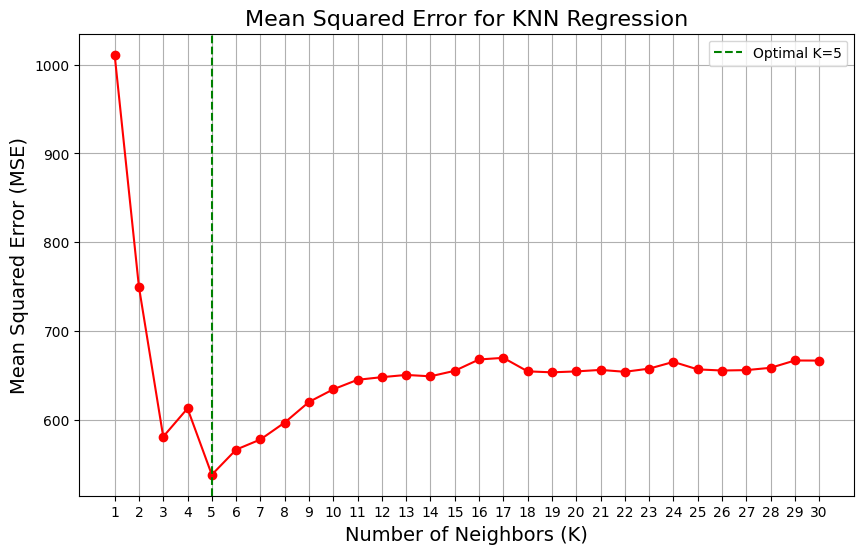

In [56]:
# Select features and target variable for regression
X_reg = data[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]
y_reg = data['Spending Score (1-100)']  # Assuming you want to predict Spending Score

# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# MSE results for different K values
mse_results = []
for k in range(1, 31):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = knn_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mse_results.append(mse)

# Print the MSE results
print("Mean Squared Error for different K values:")
print(mse_results)

# Determine the optimal K value
optimal_k_reg = np.argmin(mse_results) + 1
print(f"Optimal K value for regression: {optimal_k_reg}")

# Plotting MSE results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), mse_results, marker='o', color='red')
plt.title('Mean Squared Error for KNN Regression', fontsize=16)
plt.xlabel('Number of Neighbors (K)', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xticks(range(1, 31))
plt.grid(True)
plt.axvline(optimal_k_reg, color='green', linestyle='--', label=f'Optimal K={optimal_k_reg}')
plt.legend()
plt.show()


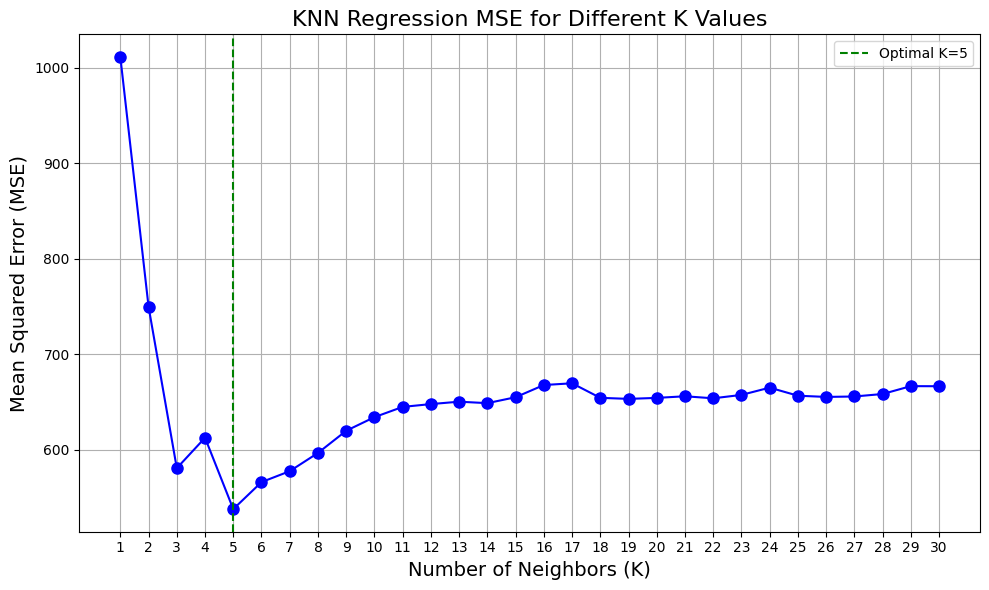

In [57]:
import matplotlib.pyplot as plt

# Plotting MSE results with enhanced visualization
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(range(1, 31), mse_results, marker='o', color='blue', linestyle='-', markersize=8)
plt.title('KNN Regression MSE for Different K Values', fontsize=16)
plt.xlabel('Number of Neighbors (K)', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xticks(range(1, 31))  # Set x-ticks to show all K values
plt.grid(True)  # Add grid lines for better readability
plt.axvline(optimal_k_reg, color='green', linestyle='--', label=f'Optimal K={optimal_k_reg}')  # Mark optimal K
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [58]:
knn_reg_optimal = KNeighborsRegressor(n_neighbors=optimal_k_reg)
knn_reg_optimal.fit(X_train_reg, y_train_reg)
y_pred_reg_optimal = knn_reg_optimal.predict(X_test_reg)
mse_optimal = mean_squared_error(y_test_reg, y_pred_reg_optimal)
print(f"MSE with optimal K ({optimal_k_reg}): {mse_optimal}")

MSE with optimal K (5): 537.8937142857143


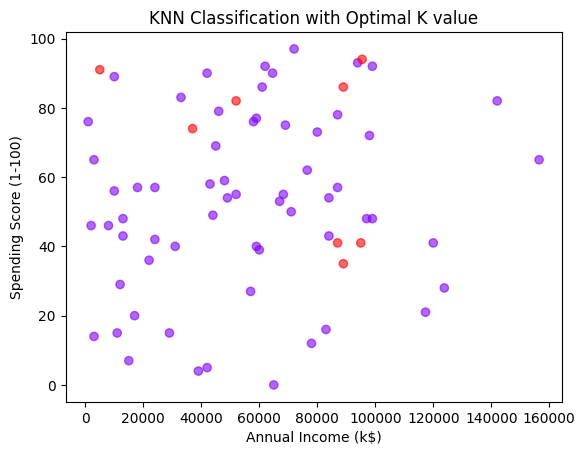

In [59]:
plt.scatter(X_test.iloc[:, 1], X_test.iloc[:, 2], c=y_pred_optimal, cmap='rainbow', alpha=0.6)
plt.title(f'KNN Classification with Optimal K value')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Image Compression

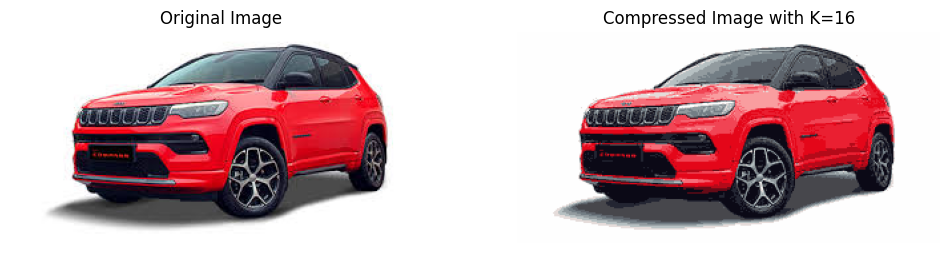

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image_path = '/content/images.jpeg'  # Define the image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image is not corrupted.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)  # Reshape to (num_pixels, 3)

    # Apply K-means clustering
    k = 16  # Number of colors
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)

    # Replace each pixel value with its corresponding cluster center
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_].astype(int)

    # Reshape back to the original image shape
    compressed_image = compressed_pixels.reshape(image.shape)

    # Display the original and compressed images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image)
    plt.title(f'Compressed Image with K={k}')
    plt.axis('off')

    plt.show()

In [64]:
import numpy as np
from sklearn.metrics import silhouette_score

def calculate_sse(image_data_with_clusters, cluster_means):
    """
    Calculate the Sum of Squared Errors (SSE) for K-means clustering.

    Parameters:
    - image_data_with_clusters: np.ndarray, an array where each row represents a pixel
      and the last column represents the cluster index.
    - cluster_means: np.ndarray, an array of cluster centroids (means).

    Returns:
    - sse: float, the calculated SSE.
    """
    sse = 0
    # Iterate over each pixel and its assigned cluster
    for i, cluster in enumerate(image_data_with_clusters[:, -1]):
        cluster_idx = int(cluster)  # Convert cluster label to integer
        # Calculate the squared distance from the pixel to its cluster mean
        sse += np.sum((image_data_with_clusters[i, :-1] - cluster_means[cluster_idx]) ** 2)
    return sse

# Assuming pizza_img is the original pixel data

# Assuming image_data_with_clusters is the original pixel data with clusters
# pixels is the reshaped image data
image_data_with_clusters = np.column_stack([pixels, kmeans.labels_])

silhouette_avg = silhouette_score(image_data_with_clusters[:, :-1], image_data_with_clusters[:, -1])
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

Silhouette Coefficient: 0.6914
